<a href="https://colab.research.google.com/github/Next-Sunshine/TFF0318/blob/master/HDF5_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install h5py

In [0]:
!pip install --quiet --upgrade tensorflow_federated

     |████████████████████████████████| 430kB 2.9MB/s 
     |████████████████████████████████| 102kB 5.7MB/s 
     |████████████████████████████████| 2.2MB 8.0MB/s 
     |████████████████████████████████| 20.0MB 1.3MB/s 
     |████████████████████████████████| 421.8MB 35kB/s 
     |████████████████████████████████| 296kB 44.2MB/s 
     |████████████████████████████████| 2.8MB 38.7MB/s 
     |████████████████████████████████| 450kB 46.8MB/s 
     |████████████████████████████████| 3.9MB 43.6MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [0]:
import collections

import numpy as np
import tensorflow as tf
import tensorflow_federated as tff
import h5py
import random
import math
import gc

tf.compat.v1.enable_v2_behavior()

np.random.seed(0)

tff.federated_computation(lambda: 'Hello,world!')()

b'Hello,world!'

In [0]:
#装载数据集
#emnist_train, emnist_test = tff.simulation.datasets.emnist.load_data()

In [0]:
'''
example_dataset = emnist_train.create_tf_dataset_for_client(
    emnist_train.client_ids[0]
)
example_element = next(iter(example_dataset))
example_element['label'].numpy()  #加了.numpy（）是在取numpy()属性的值，就是用.取属性值的意思
'''

"\nexample_dataset = emnist_train.create_tf_dataset_for_client(\n    emnist_train.client_ids[0]\n)\nexample_element = next(iter(example_dataset))\nexample_element['label'].numpy()  #加了.numpy（）是在取numpy()属性的值，就是用.取属性值的意思\n"

In [0]:
# #网上的代码，跟着做一做
# import PIL as Image
# input_data = tf.keras.datasets.mnist.load_data() 

In [0]:
# #生成200张图片
# def gen_image(arr, index, label):
#   #直接保存arr是黑底照片，1.0-arr是白底照片
#   matrix = (np.reshape(1.0 - arr, (28,28)) * 255).astype(np.uint8)
#   img = Image.fromarray(matrix, 'L')
#   #存储图片时，label_index的格式傍边在制作数据集时，从文件名即可知道label
#   img.save("./images/{}_{}.png".format(label, index))

# # data = input_data
# x, y = mnist_train(200)
# for i,(arr, label) in enumerate(zip(x, y)):
#   print(i, label)
#   gen_image(arr, i, label)

In [0]:
'''
import cv2
import os
from keras.datasets import mnist
'''

'\nimport cv2\nimport os\nfrom keras.datasets import mnist\n'

In [0]:
'''
#将mnist数据集图片提取出来
str_1 = 'mnist_train'
str_2 = 'mnist_test'

if os.path.exists(str_1) is False:
  os.mkdir(str_1)

if os.path.exists(str_2) is False:
  os.mkdir(str_2)

(X_train, Y_train),(X_test, Y_test) = mnist_train, mnist_test
#迭代0到59999之间的数字
for i in range(0,59999): 
  fileName = "mnist_train/"+str(Y_train[i]) + "_" + str(i) +".jpg"
  cv2.imwrite(fileName, X_train[i])
for i in range(0,9999):
  fileName = "mnist_test/"+str(Y_test[i]) + "_" + str(i) + ".jpg"
  cv2.imwrite(fileName, X_test[i])
'''

'\n#将mnist数据集图片提取出来\nstr_1 = \'mnist_train\'\nstr_2 = \'mnist_test\'\n\nif os.path.exists(str_1) is False:\n  os.mkdir(str_1)\n\nif os.path.exists(str_2) is False:\n  os.mkdir(str_2)\n\n(X_train, Y_train),(X_test, Y_test) = mnist_train, mnist_test\n#迭代0到59999之间的数字\nfor i in range(0,59999): \n  fileName = "mnist_train/"+str(Y_train[i]) + "_" + str(i) +".jpg"\n  cv2.imwrite(fileName, X_train[i])\nfor i in range(0,9999):\n  fileName = "mnist_test/"+str(Y_test[i]) + "_" + str(i) + ".jpg"\n  cv2.imwrite(fileName, X_test[i])\n'

In [0]:
# ###############创建一个文件
#这里最好写成
# with h5py.File('mytestfile.hdf5, 'w') as f:否则打开了以后向里面写东西还要
#使用f.close()显式关闭，不然就会报错
#OSError: Unable to create file (unable to truncate a file which is already open)
f = h5py.File('mytestfile.hdf5','w')

In [0]:
# #向文件里面写一个数据，形状为(100,)，类型为i
# dset = f.create_dataset('mydefault', (100,), dtype='i')

In [0]:
# f.close()

In [0]:
# #with h5py.File('mytestfile.hdf5', 'r') as f:
# f = h5py.File('mytestfile.hdf5', 'r')
# list(f.keys())

In [0]:
# dset = f['mydefault']
# dset.shape  #(100,)
# dset.dtype  #dtype('int32')
# #数组切片
# dset = np.arange(100)
# dset[0]  #0
# dset[10] #10
# dset[0:100:10]

In [0]:
# #Groups
# f = h5py.File('foo.hdf5','w')

In [0]:
# f.name

In [0]:
# f.keys()

In [0]:
# #创建新组
# grp = f.create_group("bar")
# grp.name

In [0]:
# subgrp = grp.create_group("baz")

In [0]:
# subgrp.name

In [0]:
# #隐式创建多个中间组
# grp2 = f.create_group("some/long/path")
# grp2.name

In [0]:
# grp3 = f['/some/long']
# grp3.name

In [0]:
# #索引异常
# myds = subgrp["MyDS"]
# missing = subgrp["missing"]

In [0]:
# #删除对象，但是我一删除就报错
# del subgrp["baz"]

In [0]:
# #把一个对象复制给group里面的name
# grp["name"] = 42
# out = grp["name"]
# out

In [0]:
# #当要存储的对象是现有组或数据集时，将对该对象建立新链接：
# grp["other name"] = out
# grp["other name"]

In [0]:

# grp["other name"] == grp["name"]

In [0]:
# #创建软links
# myfile = h5py.File('foo2.hdf5','w')
# group = myfile.create_group("somegroup")

In [0]:

# myfile["alias"] = h5py.SoftLink('/somegroup')

In [0]:
# #如果目标被移除，它们将“悬挂”：
# del myfile['somegroup']
# print(myfile['alias'])

In [0]:
# #创建数据集
# #使用Group.create_dataset（）或Group.require_dataset（）创建新数据集。
# #应使用组索引语法（dset=group[“name”]）检索现有数据集。
# #要使数据集为空，只需指定名称、形状和可选的数据类型（默认为“f”）：
# dset = f.create_dataset("default", (100,))
# dset = f.create_dataset("ints", (100,), dtype='i8')

In [0]:
# #可以将现有数据集初始化为Numpy数组
# arr = np.arange(100)
# dset = f.create_dataset("init", data=arr)

In [0]:
# #查看值
# dset.value
# dset.file

In [0]:
# #要启用分块存储，请将关键字chunks设置为表示块形状的元组：
# dset = f.create_dataset("chunked", (1000,1000), chunks=(100,100))

In [0]:
# #由于选择块形状可能会令人困惑，因此您可以让h5py为您猜测块形状
# dset = f.create_dataset("autochunk", (1000,1000), chunks=True)

In [0]:
# dset = f.create_dataset("resizable", (10,10), maxshape=(500,20))

In [0]:
# dset = f.create_dataset("unlimited", (10,10), maxshape=(None,10))

In [0]:
# #读写数据
# dset = f.create_dataset("MyDataset", (10,10,10), 'f')
# dset[0,0,0] #0.0

In [0]:
# dset[0,2:10,1:9:3]
# dset[:,::2,5]
# dset[0]
# dset.value
# dset[1,5] #第一行第五列
# dset[0,...]
# dset[...,6]


In [0]:
#对于复合数据，可以在数字切片旁边指定多个字段名：
#dset["FieldA"]

In [0]:
'''
#创造和读空属性空数据集
#创建空属性
obj.attrs["EmptyAttr"] = h5py.Empty("f")
#读空属性
obj.attrs["EmptyAttr"]
'''

'\n#创造和读空属性空数据集\n#创建空属性\nobj.attrs["EmptyAttr"] = h5py.Empty("f")\n#读空属性\nobj.attrs["EmptyAttr"]\n'

In [0]:
# #胡乱练习
# f = h5py.File("test.hdf5",'w')

In [0]:
# #创建一个组
# test_group = f.create_group("test_group")

In [0]:
mnist_train, mnist_test = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
#mnist_train

In [0]:
# #创建一个数据集
# test_dataset_ = test_group.create_dataset("dataset_", data=
#             mnist_train[0])

In [0]:
# #创建一个数据集
# test_dataset = test_group.create_dataset("dataset22", data=
#             [mnist_train[0][i] for i in range(len(mnist_train[1]))
#             if(mnist_train[1][i]==1)
#              ])


### 装载EMNIST里面的digit数据集

In [0]:
#读取EMNIST数据集的Digit
# 引入必要的库函数
from tensorflow.python.keras.utils.data_utils import get_file
from tensorflow.python.util.tf_export import tf_export
import gzip

# 读取本地gz文档，并转换为numpy矩阵的函数
def load_localData():
  
  files = ['emnist-digits-train-labels-idx1-ubyte.gz', 'emnist-digits-train-images-idx3-ubyte.gz', 'emnist-digits-test-labels-idx1-ubyte.gz', 'emnist-digits-test-images-idx3-ubyte.gz']
  path = ['emnist-digits-train-labels-idx1-ubyte.gz', 'emnist-digits-train-images-idx3-ubyte.gz', 'emnist-digits-test-labels-idx1-ubyte.gz', 'emnist-digits-test-images-idx3-ubyte.gz']

  with gzip.open(path[0], 'rb') as lpath:
    y_train = np.frombuffer(lpath.read(), np.uint8, offset=8)
  with gzip.open(path[1], 'rb') as imgpath:
    x_train = np.frombuffer(imgpath.read(), np.uint8, offset=16).reshape(len(y_train), 28, 28)
  with gzip.open(path[2], 'rb') as lpath:
    y_test = np.frombuffer(lpath.read(), np.uint8, offset=8)
  with gzip.open(path[3], 'rb') as imgpath:
    x_test = np.frombuffer(imgpath.read(), np.uint8, offset=16).reshape(len(y_test), 28, 28)
  return x_train, y_train, x_test, y_test

In [0]:
x_train_emnist_gidits, y_train_emnist_gidits, x_test_emnist_gidits, y_test_emnist_gidits = load_localData()

In [0]:
print(y_train_emnist_gidits[0:100])
# from matplotlib import pyplot as plt
# k = 3
# print(y_train[k])
# plt.imshow(x_train[k],cmap='gray')
# plt.grid(False)
# plt.show()

[8 9 6 3 6 6 7 1 9 0 9 6 8 4 8 3 3 7 0 9 5 1 1 8 1 9 9 1 4 7 0 1 4 4 4 5 9
 2 8 2 6 4 1 2 8 8 8 8 0 2 9 1 9 0 9 5 1 0 6 9 8 2 4 8 9 4 8 5 8 5 8 5 4 3
 5 2 0 2 2 8 7 4 7 0 8 2 5 3 4 8 7 3 9 2 4 5 6 1 0 8]


### 构造联邦测试集

In [0]:
'''
emnist中的数字测试集是平衡的，可以直接拿来用，共40000张图片，平均分给50个客户端
'''

In [0]:
#删除一个h5py文件
f_t.flush()
f_t.clear()


In [0]:
#创建文件
f_t = h5py.File("test.hdf5","a")
top_group = f_t.create_group("examples")

In [0]:
#将10个类别平均放到500个客户端中，每个客户端每个类别放12个
import random
NUM_CLIENTS = 50  #写的时候最初用50，用500时间太长
NUM_PER_CLASS = 80
NUM_CLASS = 10

pixels = [[]for i in range(NUM_CLIENTS)]
label = [[]for i in range(NUM_CLIENTS)]
client_ids = []
for i in range(len(y_test_emnist_gidits)):
  #随机产生一个客户端的下标然后将该图片给放进去
    random_client_id = random.randint(0, NUM_CLIENTS-1)
    pixels[random_client_id].append(x_test_emnist_gidits[i]/255.0)
    label[random_client_id].append(y_test_emnist_gidits[i])
    
#将pixels和label加入对应client的group中
for i in range(NUM_CLIENTS):
  client_ids.append("f00_" + str(i))
  temp_group = top_group.create_group(name="f00_" + str(i))
  label_ds = temp_group.create_dataset(name="label", data=np.array(label[i], dtype='int32'))
  pixels_ds = temp_group.create_dataset(name="pixels", data=np.array(pixels[i], dtype='float32'))

In [0]:
num1 = 0
num2 = 0
for j in range(NUM_CLIENTS):
  #print("pixels",len(pixels[j]))
  num1 = num1 + len(pixels[j])
  num2 = num2 + len(label[j])
  #print("label",label[j])
print(num1)
print(num2)
print(len(y_test_emnist_gidits))

40000
40000
40000


In [0]:
del pixels[:]
del label[:]
gc.collect()

In [0]:
# #创建一个dict表示client_id到DataSets的键值对
# f2 = h5py.File("test.hdf5",'r')
# #这样可以得到创建的数据集里面的值
# print(f2["test_group"]["dataset22"].value)



#首先将训练集0-9每个元素的数字拿出来，后面备用
class_ = [[]for i in range(10)]
for i in range(len(x_train_emnist_gidits)):
  label = y_train_emnist_gidits[i]
  class_[label].append(x_train_emnist_gidits[i])  #在对应的label中放入图片
 

In [0]:
for i in range(10):
  print(len(class_[i]))

24000
24000
24000
24000
24000
24000
24000
24000
24000
24000


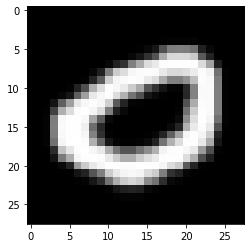

In [0]:
#验证拿对了没有
from matplotlib import pyplot as plt
plt.imshow(class_[0][100],cmap='gray')
plt.grid(False)
plt.show()

### 构造BAL1

In [0]:
bal1_balance_class = [[]for i in range(10)]  
for i in range(0,10):
  bal1_balance_class[i] = class_[i][0:6000]
  #print(len(balance_class[i]))

In [0]:
#删除一个h5py文件
f0.flush()
f0.clear()

In [0]:
f0 = h5py.File("BAL1.hdf5","a")
#del f["group"]
group = f0.create_group("examples")
#ds0 = root_group.create_dataset("ds0", data=dataset)

In [0]:
#将10个类别平均放到500个客户端中，每个客户端每个类别放12个
import random
NUM_CLIENTS = 100  #写的时候最初用50，用500时间太长
NUM_PER_CLASS = 60
NUM_CLASS = 10

##tf.data.Dataset.from_tensor_slices就能得到一个TensorSliceDataset对象
#Collections.Orderdict->TensorSliceDataset+client_id->hdf5->HDF5ClientData
#<TensorSliceDataset shapes: OrderedDict([(label, ()), (pixels, (28, 28))]), types: OrderedDict([(label, tf.int32), (pixels, tf.float32)])>
#取出图片列表以备用

pixels = []
label=[]
client_ids = []

for i in range(NUM_CLIENTS):  #i客户端数量
  for j in range(10):  #j是类别数
    for k in range(NUM_PER_CLASS): #k控制每个类别里面放多少张图片
      pixels.append(bal1_balance_class[j][i*NUM_PER_CLASS+k]/255.0) #转成0-1之内的数字再加入pixels
      label.append(j)  #加入label
  #print(str(i))
  client_ids.append("f00_" + str(i))
  temp_group = group.create_group(name="f00_" + str(i))
  label_ds = temp_group.create_dataset(name="label", data=np.array(label, dtype='int32'))
  pixels_ds = temp_group.create_dataset(name="pixels", data=np.array(pixels, dtype='float32'))
  # print("label_ds:", len(label_ds.value))
  print("label", len(label))
  print("label",label)
  pixels.clear()
  label.clear()


label 600
label [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [0]:
# plt.imshow(f0["examples"][client_ids[0]]["pixels"].value[0],cmap='gray')
print(len(f0["examples"][client_ids[0]]["label"].value))
print(f0["examples"][client_ids[1]]["label"].value)
# #plt.imshow(class_[0][0]/255.0,cmap='gray')

# plt.grid(False)
# plt.show()


600
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 8
 8 8 8 8 8 8 8 8 8 8 

In [0]:
#清空
del pixels[:]
del label[:]
del bal1_balance_class[:]
gc.collect()

0

In [0]:
#这里应该是一个HDF5ClientData类型
#仿照emnist创建一个该实例
TestNIST = tff.simulation.hdf5_client_data.HDF5ClientData("mynist2.hdf5")
TestNIST.element_type_structure 
len(TestNIST.client_ids)

/usr/local/lib/python3.6/dist-packages/tensorflow_federated/python/simulation/hdf5_client_data.py:63: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  collections.OrderedDict((name, ds.value) for name, ds in sorted(


500

/usr/local/lib/python3.6/dist-packages/tensorflow_federated/python/simulation/hdf5_client_data.py:63: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  collections.OrderedDict((name, ds.value) for name, ds in sorted(


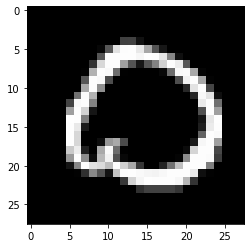

In [0]:
#BAL1 = tff.simulation.hdf5_client_data.HDF5ClientData("BAL2.hdf5")
#查看数据集里面的图片是否正常，为什么在TestForTFFCopy里面就很正常，但是这里画出来不正常
example_dataset = TestNIST.create_tf_dataset_for_client(
    TestNIST.client_ids[2]
)

example_element = next(iter(example_dataset))
example_element['label'].numpy()  #加了.numpy（）是在取numpy()属性的值，就是用.取属性值的意思

from matplotlib import pyplot as plt
plt.imshow(example_element['pixels'].numpy(), cmap='gray', aspect='equal')
plt.grid(False)
_=plt.show()

### **构造BAL2**


In [0]:
#构造BAL2
'''
标量平衡:每个本地600张
全局平衡：共10个类，每个类10张
局部平衡：随机.基本上每个客户端都有10个类，每类的图片50-70不等
num_clients = 100
'''

In [0]:
#构造绝对平衡图片集,10张*10类*500个客户端
#因为后面构造数据集的时候对bal2_balance_class进行了删除操作，因此每次生成数据集都要重新生成bal2_balance_class
bal2_balance_class = [[]for i in range(10)]  
for i in range(0,10):
  bal2_balance_class[i] = class_[i][0:6000]
  #print(len(balance_class[i]))

In [0]:
#删除一个h5py文件
f2.flush()
f2.clear()

In [0]:
#创建hdf5文件
f2 = h5py.File("BAL2.hdf5","a")
#创建顶层group
top_group = f2.create_group("examples")

In [0]:
f2["examples"].items()

ItemsViewHDF5(<HDF5 group "/examples" (0 members)>)

In [0]:
#创建BAL2:使用了洗牌算法
#将10个类别平均放到500个客户端中，每个客户端每个类别放12个
import random
NUM_CLIENTS = 100  #写的时候最初用50，用500时间太长
NUM_CLASS = 10
NUM_PER_CLASS = 60

#label里面有很多label，pixels里面有很多个pixels
#浅拷贝temp_balance_class = balance_class修改temp的值原来的值也会变，不适合
#使用深拷贝将balance_class里面的元素拷贝出来，
pixels = []
label=[]
client_ids = []
for i in range(NUM_CLIENTS):  #i客户端数量
  j = 0
  #j是每个客户端控制取多少张图片
  #使用while循环方便控制当选到label是i但是i已经被之前的客户端选择完了的情况，增设j控制
  while(j<NUM_CLASS*NUM_PER_CLASS):
    index_label = random.randint(0, NUM_CLASS-1) #随机产生一个label下标
    num_remain_pixels = len(bal2_balance_class[index_label])
    if(num_remain_pixels>0):
      index_pixels = random.randint(0,num_remain_pixels-1)  #在label剩下的数中随机产生一个pixels下标
      j = j+1
    else:
      continue
    pixels.append(bal2_balance_class[index_label][index_pixels]/255.0) #转成0-1之内的数字再加入pixels
    label.append(index_label)  #加入label
    del bal2_balance_class[index_label][index_pixels] #使用下标删除元素,但是不能删除array的元素
  
  client_ids.append("f00_" + str(i))
  temp_group = top_group.create_group(name="f00_" + str(i))
  label_ds = temp_group.create_dataset(name="label", data=np.array(label, dtype='int32'))
  pixels_ds = temp_group.create_dataset(name="pixels", data=np.array(pixels, dtype='float32'))
  print("label", len(label))
  print("label",label)
  pixels.clear()
  label.clear()
#bal2_balance_class.clear()

label 600
label [7, 5, 6, 8, 1, 2, 6, 0, 6, 0, 8, 3, 8, 7, 5, 9, 6, 3, 0, 7, 2, 6, 5, 8, 3, 2, 3, 0, 8, 3, 3, 9, 5, 5, 6, 2, 4, 0, 3, 8, 2, 2, 4, 7, 9, 2, 7, 2, 3, 5, 7, 1, 0, 3, 3, 2, 8, 0, 6, 4, 9, 9, 3, 2, 3, 5, 7, 6, 9, 9, 2, 9, 9, 7, 0, 0, 2, 4, 2, 0, 5, 0, 7, 9, 7, 3, 1, 1, 6, 2, 0, 4, 7, 1, 5, 1, 1, 5, 4, 6, 7, 8, 9, 3, 3, 7, 3, 1, 6, 4, 5, 9, 0, 7, 9, 0, 2, 9, 4, 8, 7, 3, 5, 0, 9, 8, 0, 1, 8, 7, 0, 1, 7, 8, 2, 4, 9, 6, 8, 3, 8, 1, 0, 9, 1, 6, 0, 1, 1, 5, 0, 3, 2, 5, 1, 6, 1, 4, 5, 6, 7, 0, 8, 1, 8, 0, 2, 1, 4, 3, 2, 9, 4, 6, 9, 9, 3, 2, 2, 8, 9, 0, 5, 7, 0, 5, 8, 9, 4, 7, 3, 2, 2, 8, 7, 8, 8, 2, 8, 5, 1, 2, 4, 2, 5, 4, 6, 8, 5, 3, 2, 4, 1, 0, 9, 8, 2, 7, 8, 6, 3, 9, 2, 6, 6, 8, 0, 1, 8, 2, 3, 2, 2, 9, 1, 0, 4, 0, 2, 5, 8, 8, 7, 4, 1, 0, 0, 0, 5, 4, 1, 8, 7, 5, 5, 7, 2, 6, 6, 5, 5, 2, 3, 6, 0, 8, 0, 7, 3, 1, 9, 1, 7, 8, 1, 6, 7, 6, 7, 1, 7, 2, 7, 6, 2, 6, 1, 4, 6, 9, 5, 4, 9, 4, 4, 1, 7, 5, 7, 0, 4, 2, 3, 0, 4, 2, 7, 8, 4, 9, 7, 3, 3, 1, 3, 2, 8, 6, 2, 0, 0, 5, 6, 2, 6, 5, 3, 5,

In [0]:
#统计一下每个客户端里面各个类别有多少张
num = np.zeros(shape=(10))
print(f2["examples"][client_ids[0]]["label"].value[0])
n = len(f2["examples"][client_ids[0]]["label"].value)
print(n)
print(f2["examples"][client_ids[0]]["label"].value)
for i in range(n):
  label_value = f2["examples"][client_ids[0]]["label"].value[i]
  num[label_value] = num[label_value] + 1

print(num)
# BAL2 = tff.simulation.hdf5_client_data.HDF5ClientData("BAL2.hdf5")
# example_dataset = BAL2.create_tf_dataset_for_client(
#     BAL2.client_ids[1]
# )

# example_element = next(iter(example_dataset))
# example_element['label'].numpy()  #加了.numpy（）是在取numpy()属性的值，就是用.取属性值的意思

# from matplotlib import pyplot as plt
# plt.imshow(example_element['pixels'].numpy(), cmap='gray', aspect='equal')
# plt.grid(False)
# _=plt.show()

7
600
[7 5 6 8 1 2 6 0 6 0 8 3 8 7 5 9 6 3 0 7 2 6 5 8 3 2 3 0 8 3 3 9 5 5 6 2 4
 0 3 8 2 2 4 7 9 2 7 2 3 5 7 1 0 3 3 2 8 0 6 4 9 9 3 2 3 5 7 6 9 9 2 9 9 7
 0 0 2 4 2 0 5 0 7 9 7 3 1 1 6 2 0 4 7 1 5 1 1 5 4 6 7 8 9 3 3 7 3 1 6 4 5
 9 0 7 9 0 2 9 4 8 7 3 5 0 9 8 0 1 8 7 0 1 7 8 2 4 9 6 8 3 8 1 0 9 1 6 0 1
 1 5 0 3 2 5 1 6 1 4 5 6 7 0 8 1 8 0 2 1 4 3 2 9 4 6 9 9 3 2 2 8 9 0 5 7 0
 5 8 9 4 7 3 2 2 8 7 8 8 2 8 5 1 2 4 2 5 4 6 8 5 3 2 4 1 0 9 8 2 7 8 6 3 9
 2 6 6 8 0 1 8 2 3 2 2 9 1 0 4 0 2 5 8 8 7 4 1 0 0 0 5 4 1 8 7 5 5 7 2 6 6
 5 5 2 3 6 0 8 0 7 3 1 9 1 7 8 1 6 7 6 7 1 7 2 7 6 2 6 1 4 6 9 5 4 9 4 4 1
 7 5 7 0 4 2 3 0 4 2 7 8 4 9 7 3 3 1 3 2 8 6 2 0 0 5 6 2 6 5 3 5 5 3 1 3 1
 3 4 8 7 1 1 8 2 6 7 5 2 0 5 8 4 2 9 1 6 7 8 3 9 4 9 9 5 3 1 4 8 5 7 0 8 7
 8 4 4 2 6 2 0 0 3 9 2 2 8 9 2 5 0 1 9 5 6 8 3 5 4 3 5 1 3 1 9 8 9 7 8 6 1
 2 9 2 9 2 0 9 8 5 2 9 4 5 1 2 8 4 5 8 3 4 6 9 0 4 9 6 3 5 9 0 0 8 5 5 6 9
 6 5 0 7 4 2 2 1 8 6 7 7 6 0 3 7 4 6 2 7 3 7 2 8 4 4 0 8 4 4 4 0 0 6 1 3 7
 5 8 9 7 5 3 1 4 9 

In [0]:
# f2["examples"][client_ids[0]]["label"].value

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  """Entry point for launching an IPython kernel.


array([9, 8, 8, 6, 0, 4, 0, 9, 2, 6, 3, 9, 9, 4, 7, 0, 4, 7, 7, 2, 0, 7,
       8, 8, 7, 5, 7, 8, 6, 5, 2, 3, 7, 0, 6, 2, 8, 7, 6, 9, 0, 2, 5, 0,
       5, 2, 1, 3, 9, 3, 1, 5, 5, 8, 8, 8, 3, 3, 3, 4, 2, 6, 5, 1, 1, 0,
       5, 7, 2, 3, 6, 4, 1, 8, 5, 3, 9, 8, 3, 3, 4, 1, 9, 1, 3, 2, 3, 4,
       3, 8, 9, 5, 9, 8, 7, 7, 1, 0, 8, 0], dtype=int32)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  """Entry point for launching an IPython kernel.


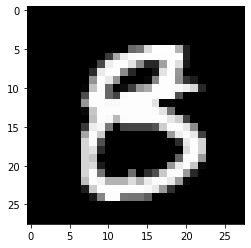

In [0]:
#把图片画出来看一看
plt.imshow(f2["examples"][client_ids[0]]["pixels"].value[0],cmap='gray')
plt.grid(False)
plt.show()

In [0]:
# f2["examples"][client_ids[0]]["pixels"].value[0]

### 构造BAL3

In [0]:
'''
构造BAL3数据集
全局平衡：10个label，每个label6000张图片
标量不平衡，局部Non-IID
客户端：100，C=0.02
60000张图片随机分给100个用户
每个用户540-670不等
'''

In [0]:
#获得全局绝对平衡数据集
bal3_balance_class = [[]for i in range(10)]  
for i in range(0,10):
  bal3_balance_class[i] = class_[i][0:6000]
for i in range(10):
  print(len(bal3_balance_class[i]))

6000
6000
6000
6000
6000
6000
6000
6000
6000
6000


In [0]:
#删除一个h5py文件
f3.flush()
f3.clear()

In [0]:
#创建hdf5文件
f3 = h5py.File("BAL3.hdf5","a")
#创建顶层group
top_group = f3.create_group("examples")

In [0]:
#创建BAL3
#将60000张图片随机分给100个客户端
import random
NUM_CLIENTS = 100  #写的时候最初用50，用500时间太长
NUM_CLASS = 10
NUM_PER_CLASS = 60


pixels = [[]for i in range(NUM_CLIENTS)]
label = [[]for i in range(NUM_CLIENTS)]
client_ids = []

for i in range(NUM_CLASS):  #循环10*5000
  for j in range(0,len(bal3_balance_class[i])):
    #随机产生一个客户端的下标然后将该图片给放进去
    random_client_id = random.randint(0, NUM_CLIENTS-1)
    pixels[random_client_id].append(bal3_balance_class[i][j]/255.0)
    label[random_client_id].append(i)
  # if(i == 1):
  #   for i in range(NUM_CLIENTS):
  #     print("label:",len(label[i]))
  #     print(label[i])
#将pixels和label加入对应client的group中
for i in range(NUM_CLIENTS):
  client_ids.append("f00_" + str(i))
  temp_group = top_group.create_group(name="f00_" + str(i))
  label_ds = temp_group.create_dataset(name="label", data=np.array(label[i], dtype='int32'))
  pixels_ds = temp_group.create_dataset(name="pixels", data=np.array(pixels[i], dtype='float32'))
  # if(i < 5):
  #   print("label:",len(label[i]))
  #   print(label[i])

In [0]:
#统计一下每个客户端里面各个类别有多少张
num = np.zeros(shape=(10))
print(f3["examples"][client_ids[0]]["label"].value[0])
n = len(f3["examples"][client_ids[0]]["label"].value)
print(n)
print(f3["examples"][client_ids[0]]["label"].value)
for i in range(n):
  label_value = f3["examples"][client_ids[0]]["label"].value[i]
  num[label_value] = num[label_value] + 1

print(num)
all_num = 0
for i in range(NUM_CLIENTS):
  all_num = all_num + len(f3["examples"][client_ids[i]]["label"].value)
  print(len(f3["examples"][client_ids[i]]["label"].value))
print(all_num)

0
632
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 

In [0]:
#构造完了以后把bal3_balance_class数据删了,释放内存
del bal3_balance_class[:]
del label[:]
del pixels[:]
gc.collect()

4662

0


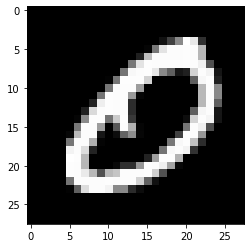

In [0]:
#实例化并把图片取出来看一看
BAL3 = tff.simulation.hdf5_client_data.HDF5ClientData("BAL3.hdf5")
example_dataset = BAL3.create_tf_dataset_for_client(
    BAL3.client_ids[90]
)

example_element = next(iter(example_dataset))
print(example_element['label'].numpy())  #加了.numpy（）是在取numpy()属性的值，就是用.取属性值的意思

from matplotlib import pyplot as plt
plt.imshow(example_element['pixels'].numpy(), cmap='gray', aspect='equal')
plt.grid(False)
_=plt.show()

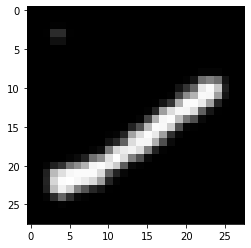

In [0]:
#把图片画出来看一看
plt.imshow(f3["examples"][client_ids[0]]["pixels"].value[78],cmap='gray')
plt.grid(False)
plt.show()

### 构造BAL4

In [0]:
'''
BAL4：标量不平衡，全局不平衡，局部不平衡
使用原始的mnist
60000张图片随机分给100个客户端，每个客户端数目不固定.
我看了一下，前60000张图片每类的数量在5900-6200之间，相当均匀，不太随机，于是我决定在训练集中随机选60000张图片
客户端图片在440-820不等
'''

In [0]:
#获取总的数据集,取emnist_digit测试集中的前60000个

#因为需要使用删除操作所以不能直接使用=赋值
#copy_x_train = []
copy_y_train = []
x_class = []
y_class = []
for i in range(len(x_train_emnist_gidits)):
  #copy_x_train.append(x_train_emnist_gidits[i])
  copy_y_train.append(y_train_emnist_gidits[i])

for i in range(60000):
  #因为只使用一个随机数产生的还是有点均匀，我决定去网上寻找非均匀的分布
  start = random.randint(0,len(copy_y_train)//2)
  #随机产生一个下标
  random_index = random.randint(start,len(copy_y_train)-1)
  label_val = copy_y_train[random_index]
  
  x_class.append(x_train_emnist_gidits[random_index])
  y_class.append(label_val)
  #del copy_x_train[random_index]
  del copy_y_train[random_index]
print(y_class)
for i in range(10):
  print(len(bal4_imbalance_class[i]))

[0, 3, 8, 1, 2, 6, 2, 3, 2, 9, 3, 7, 8, 1, 9, 9, 1, 5, 9, 1, 8, 3, 1, 1, 7, 5, 7, 6, 2, 4, 8, 1, 8, 2, 2, 8, 5, 9, 6, 7, 1, 1, 5, 6, 8, 8, 1, 2, 6, 7, 0, 6, 3, 8, 1, 6, 6, 6, 9, 0, 0, 8, 6, 5, 0, 9, 4, 3, 9, 8, 3, 0, 1, 9, 6, 5, 3, 8, 4, 2, 9, 4, 2, 1, 2, 1, 7, 1, 6, 2, 3, 2, 2, 5, 2, 2, 7, 0, 2, 1, 6, 4, 3, 3, 1, 7, 4, 9, 5, 8, 7, 4, 8, 1, 5, 7, 7, 0, 0, 2, 4, 6, 6, 3, 9, 5, 1, 2, 3, 4, 7, 7, 4, 5, 2, 7, 0, 9, 1, 2, 2, 9, 5, 3, 6, 6, 1, 7, 6, 6, 0, 1, 2, 7, 8, 5, 9, 7, 0, 2, 0, 7, 0, 7, 9, 8, 0, 0, 8, 1, 7, 3, 5, 9, 9, 0, 3, 5, 9, 1, 6, 9, 4, 5, 8, 9, 3, 8, 9, 8, 4, 6, 8, 6, 9, 5, 0, 8, 9, 4, 3, 9, 6, 0, 3, 5, 6, 0, 1, 4, 2, 1, 8, 5, 9, 8, 7, 3, 2, 8, 1, 7, 7, 6, 7, 8, 7, 2, 4, 8, 0, 1, 1, 8, 8, 7, 8, 8, 3, 7, 3, 8, 6, 9, 1, 8, 1, 1, 9, 8, 0, 4, 9, 5, 1, 5, 0, 9, 7, 7, 7, 6, 3, 1, 4, 6, 4, 2, 5, 4, 3, 5, 9, 4, 7, 6, 5, 4, 3, 4, 1, 9, 8, 8, 3, 6, 7, 9, 2, 1, 6, 4, 9, 7, 1, 0, 6, 8, 7, 5, 8, 9, 9, 5, 9, 6, 3, 6, 2, 6, 3, 3, 7, 5, 4, 4, 0, 0, 9, 9, 9, 7, 9, 8, 7, 7, 4, 0, 8, 5, 3, 6, 3, 

In [0]:
#删除一个h5py文件
f4.flush()
f4.clear()

In [0]:
#创建hdf5文件
f4 = h5py.File("BAL4.hdf5","a")
#创建顶层group
top_group = f4.create_group("examples")

In [0]:
#创建BAL4
#将60000张图片随机分给500个客户端，为了达到病态的效果，以STEP张图片为一个碎片，将碎片随机分给500个客户端
NUM_CLIENTS = 100  #写的时候最初用50，用500时间太长
NUM_CLASS = 10
NUM_PER_CLASS = 60
STEP = 20 #如果以10张图片为一个碎片

pixels = [[]for i in range(NUM_CLIENTS)]
label = [[]for i in range(NUM_CLIENTS)]
client_ids = []
#为60000张图片随机选择一个客户端并放进去
for i in range(0,NUM_CLIENTS*NUM_PER_CLASS*NUM_CLASS,STEP):  #i控制图片的下标
  random_client_id = random.randint(0, NUM_CLIENTS-1)
  for k in range(min(STEP, len(y_class)-i)):
    pixels[random_client_id].append(x_class[i+k]/255.0)
    label[random_client_id].append(y_class[i+k])


# for i in range(NUM_CLASS):  #循环10*5000
#   for j in range(0,len(bal4_imbalance_class[i]),STEP):
#     #随机产生一个客户端的下标然后将图片给放进去
#     random_client_id = random.randint(0, NUM_CLIENTS-1)
#     for k in range(min(STEP, len(bal4_imbalance_class[i])-j)):
#       pixels[random_client_id].append(bal4_imbalance_class[i][j+k]/255.0)
#       label[random_client_id].append(i)

sum = 0
for i in range(NUM_CLIENTS):
  client_ids.append("f00_" + str(i))
  temp_group = top_group.create_group(name="f00_" + str(i))
  label_ds = temp_group.create_dataset(name="label", data=np.array(label[i], dtype='int32'))
  pixels_ds = temp_group.create_dataset(name="pixels", data=np.array(pixels[i], dtype='float32'))
  sum = sum + len(label[i])
  print("num_examples",len(label[i]))
  print("content",label[i])
print("sum",sum)

num_examples 560
content [1, 9, 9, 7, 9, 9, 0, 2, 9, 9, 7, 0, 8, 4, 0, 3, 7, 3, 3, 0, 4, 2, 3, 5, 8, 5, 4, 3, 1, 0, 4, 6, 5, 1, 9, 2, 8, 9, 5, 1, 2, 0, 8, 5, 6, 9, 3, 1, 9, 0, 8, 1, 5, 3, 6, 4, 0, 0, 6, 5, 5, 2, 5, 4, 6, 8, 4, 7, 3, 5, 9, 0, 3, 6, 1, 4, 5, 2, 0, 0, 3, 4, 8, 6, 8, 7, 8, 8, 2, 3, 0, 2, 9, 0, 6, 7, 2, 0, 3, 3, 5, 2, 2, 9, 4, 6, 1, 8, 9, 2, 7, 0, 7, 7, 1, 1, 8, 5, 9, 2, 7, 0, 0, 8, 1, 5, 9, 6, 7, 0, 6, 3, 5, 2, 4, 2, 7, 2, 1, 6, 5, 4, 1, 0, 5, 1, 3, 0, 0, 3, 8, 8, 2, 2, 7, 8, 8, 4, 5, 0, 3, 0, 9, 0, 2, 6, 2, 0, 1, 1, 8, 3, 2, 5, 8, 8, 9, 7, 2, 8, 4, 7, 5, 5, 0, 4, 4, 4, 1, 0, 3, 8, 4, 9, 6, 8, 4, 9, 5, 7, 0, 2, 1, 2, 1, 2, 6, 9, 1, 5, 9, 7, 3, 7, 1, 8, 1, 5, 3, 8, 8, 8, 5, 1, 9, 3, 1, 1, 7, 2, 9, 5, 4, 5, 1, 9, 2, 7, 6, 9, 2, 7, 3, 8, 8, 4, 3, 9, 3, 0, 3, 4, 9, 2, 4, 4, 2, 2, 8, 5, 6, 6, 8, 4, 7, 7, 2, 7, 7, 7, 7, 6, 2, 6, 1, 9, 8, 6, 4, 5, 8, 7, 8, 1, 4, 2, 3, 6, 8, 4, 4, 0, 7, 8, 2, 9, 4, 4, 5, 9, 7, 8, 3, 9, 8, 6, 9, 7, 9, 5, 2, 4, 3, 9, 4, 6, 2, 1, 1, 4, 1, 8, 0, 4, 8,

In [0]:
for i in range(NUM_CLIENTS):
  print("num_examples",len(label[i]))


In [0]:
del bal4_imbalance_class[:]
del copy_y_train[:]
del x_class[:]
del y_class[:]
del pixels[:]
del label[:]
gc.collect()

### 报废操作

In [0]:
root_group = f.create_group("root_group")

In [0]:
ds1 = root_group.create_dataset("ds1", data=element["label"][0:11])
ds2 = root_group.create_dataset("ds2", data=element["label"][12:23])
#group居然有items()操作
root_group.items()

ItemsViewHDF5(<HDF5 group "/root_group" (3 members)>)

In [0]:
for name,ds in f["root_group"].items():
  print(name)
  print(ds.value)


In [0]:
#这样写element["pixels"][0]就行，真的是attrs里面装的东西太多了？
#失败了，这样使用attribute不行，同样没有.items()操作
# ds0.attrs["pixels"] = element["pixels"][0]
# ds0.attrs["lable"] = element["label"][0]
del ds0

NameError: ignored

In [0]:
f["root_group"]["ds0"]

<HDF5 dataset "ds0": shape (28, 28), type "<f4">

In [0]:
#MyNIST.element_type_structure()

In [0]:
# test_dataset.value
# from matplotlib import pyplot as plt
# plt.imshow(test_dataset[-1],cmap='gray')
# plt.grid(False)
# plt.show()

In [0]:
#emnist_train.datasets

In [0]:
# mnist_train[1][-1]

In [0]:
# from matplotlib import pyplot as plt
# plt.imshow(mnist_train[0][-1],cmap='gray')
# plt.grid(False)
# plt.show()

### 草稿

In [0]:
#读取EMNIST数据集的Digit
# 引入必要的库函数
from tensorflow.python.keras.utils.data_utils import get_file
from tensorflow.python.util.tf_export import tf_export
import gzip

# 读取本地gz文档，并转换为numpy矩阵的函数
def load_localData():
  
  files = ['emnist-digits-train-labels-idx1-ubyte.gz', 'emnist-digits-train-images-idx3-ubyte.gz', 'emnist-digits-test-labels-idx1-ubyte.gz', 'emnist-digits-test-images-idx3-ubyte.gz']
  path = ['emnist-digits-train-labels-idx1-ubyte.gz', 'emnist-digits-train-images-idx3-ubyte.gz', 'emnist-digits-test-labels-idx1-ubyte.gz', 'emnist-digits-test-images-idx3-ubyte.gz']

  with gzip.open(path[0], 'rb') as lpath:
    y_train = np.frombuffer(lpath.read(), np.uint8, offset=8)
  with gzip.open(path[1], 'rb') as imgpath:
    x_train = np.frombuffer(imgpath.read(), np.uint8, offset=16).reshape(len(y_train), 28, 28)
  with gzip.open(path[2], 'rb') as lpath:
    y_test = np.frombuffer(lpath.read(), np.uint8, offset=8)
  with gzip.open(path[3], 'rb') as imgpath:
    x_test = np.frombuffer(imgpath.read(), np.uint8, offset=16).reshape(len(y_test), 28, 28)
  return x_train, y_train, x_test, y_test

In [0]:
x_train, y_train, x_test, y_test = load_localData()

In [0]:
#print(len(y_train))
num = np.zeros(shape=(10), dtype='int32')
for i in range (len(y_test_emnist_gidits)):
  label = y_test_emnist_gidits[i]
  #print(label)
  num[label] = num[label] + 1
print(num)


[4000 4000 4000 4000 4000 4000 4000 4000 4000 4000]


In [0]:
print(y_test)

((array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...